Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


Load the dataset

In [3]:
data = pd.read_csv(r"E:\trainingset\archive\trainLabels.csv")

Preprocess the images

In [4]:
""" def preprocess(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (128,128))
    return image

images = []
labels = []

for index, row in data.iterrows():
    image = cv2.imread('E:/trainingset/archive/resized_train/' + row['image'] + '.jpeg')
    images.append(preprocess(image))
    labels.append(row['level']) """


" def preprocess(image):\n    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)\n    image = cv2.resize(image, (128,128))\n    return image\n\nimages = []\nlabels = []\n\nfor index, row in data.iterrows():\n    image = cv2.imread('E:/trainingset/archive/resized_train/' + row['image'] + '.jpeg')\n    images.append(preprocess(image))\n    labels.append(row['level']) "

In [5]:

# Specify image size
IMG_WIDTH = 128
IMG_HEIGHT = 128
CHANNELS = 3

def crop_image_from_gray(img, tol=7):
    """
    Applies masks to the orignal image and 
    returns the a preprocessed image with 
    3 channels
    
    :param img: A NumPy Array that will be cropped
    :param tol: The tolerance used for masking
    
    :return: A NumPy array containing the cropped image
    """
    # If for some reason we only have two channels
    if img.ndim == 2:
        mask = img > tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    # If we have a normal RGB images
    elif img.ndim == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img > tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        return img

def preprocess_image(image, sigmaX=10):
    """
    The whole preprocessing pipeline:
    1. Read in image
    2. Apply masks
    3. Resize image to desired size
    4. Add Gaussian noise to increase Robustness
    
    :param img: A NumPy Array that will be cropped
    :param sigmaX: Value used for add GaussianBlur to the image
    
    :return: A NumPy array containing the preprocessed image
    """
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Display the image
    # plt.imshow(image)
    # plt.title('Test Image')
    # plt.show()
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    image = cv2.addWeighted (image,4, cv2.GaussianBlur(image, (0,0) ,sigmaX), -4, 128)
    # plt.imshow(image)
    # plt.title('Test Image')
    # plt.show()
    
    return image

images = []
labels = []

for index, row in data.iterrows():
    image = cv2.imread('E:/trainingset/archive/resized_train/' + row['image'] + '.jpeg')
    images.append(preprocess_image(image))
    labels.append(row['level'])

Split the dataset into training and testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

Build the model

In [17]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

Compile and train the model

In [18]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(np.array(X_train), np.array(y_train), batch_size=128, epochs=10, verbose=1)

Epoch 1/10
220/220 [==============================] - 932s 4s/step - loss: 21.3937 - accuracy: 0.7145
Epoch 2/10
220/220 [==============================] - 880s 4s/step - loss: 0.8901 - accuracy: 0.7345
Epoch 3/10
220/220 [==============================] - 855s 4s/step - loss: 0.8769 - accuracy: 0.7346
Epoch 4/10
220/220 [==============================] - 828s 4s/step - loss: 0.8707 - accuracy: 0.7346
Epoch 5/10
220/220 [==============================] - 822s 4s/step - loss: 0.8665 - accuracy: 0.7346
Epoch 6/10
220/220 [==============================] - 824s 4s/step - loss: 0.8629 - accuracy: 0.7346
Epoch 7/10
220/220 [==============================] - 825s 4s/step - loss: 0.8563 - accuracy: 0.7346
Epoch 8/10
220/220 [==============================] - 828s 4s/step - loss: 0.8508 - accuracy: 0.7348
Epoch 9/10
220/220 [==============================] - 818s 4s/step - loss: 0.8414 - accuracy: 0.7352
Epoch 10/10
220/220 [==============================] - 810s 4s/step - loss: 0.8334 - accur

Evaluate the model

In [19]:
score = model.evaluate(np.array(X_test), np.array(y_test), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8742883801460266
Test accuracy: 0.7352690100669861


In [20]:
""" from scipy.special import softmax
probability_model = Sequential(model, softmax()) """
predictions = model.predict(np.array(X_test))
print(predictions[0])
print(len(predictions))
print(np.argmax(predictions[0]))
print(y_test[0])

220/220 [==============================] - 53s 232ms/step
[0.5430517  0.08129293 0.2963987  0.04053511 0.03872157]
7026
0
0


In [21]:
print(predictions)

[[0.5430517  0.08129293 0.2963987  0.04053511 0.03872157]
 [0.7002674  0.07812374 0.16682908 0.03082918 0.02395064]
 [0.7002674  0.07812374 0.16682908 0.03082918 0.02395064]
 ...
 [0.54706544 0.09142433 0.2685761  0.02546125 0.06747282]
 [0.7030704  0.07529113 0.16365772 0.03179958 0.02618117]
 [0.7002674  0.07812374 0.16682908 0.03082918 0.02395064]]


[8.16269100e-01 1.21742226e-01 5.84123358e-02 2.88010784e-03
 6.96255011e-04]
0
0
[8.2975918e-01 8.3152726e-03 1.5947273e-01 1.7347290e-03 7.1808812e-04]
0
0
[0.83544356 0.03417586 0.10556255 0.01352998 0.011288  ]
0
0
[0.7002674  0.07812374 0.16682908 0.03082918 0.02395064]
0
2
[0.7002674  0.07812374 0.16682908 0.03082918 0.02395064]
0
0
[0.80737007 0.02543054 0.14914176 0.01062985 0.00742775]
0
0
[0.7002674  0.07812374 0.16682908 0.03082918 0.02395064]
0
2
[0.62507874 0.08949826 0.19084816 0.04621132 0.04836346]
0
4
[0.69356626 0.05887178 0.23212083 0.00970703 0.00573407]
0
2
[0.7149888  0.06033199 0.13893837 0.03468414 0.05105664]
0
0


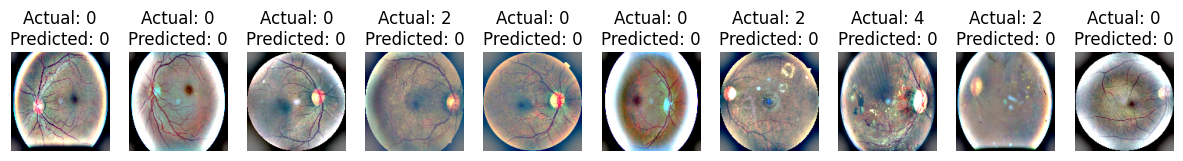

In [40]:
fig, axs = plt.subplots(1, 10, figsize=(15, 15))
for i in range(100,110):
    print(predictions[i])
    print(np.argmax(predictions[i]))
    print(y_test[i])
    axs[i-100].imshow(X_test[i])
    axs[i-100].axis('off')
    axs[i-100].set_title("Actual: " + str(y_test[i]) + "\nPredicted: " + str(np.argmax(predictions[i])))
plt.show()


not accurate

1/1 [==============================] - 0s 32ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[1. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 33ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[1. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 53ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[1. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 123ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[1. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 50ms/step
[[1. 0. 0. 0. 0.]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


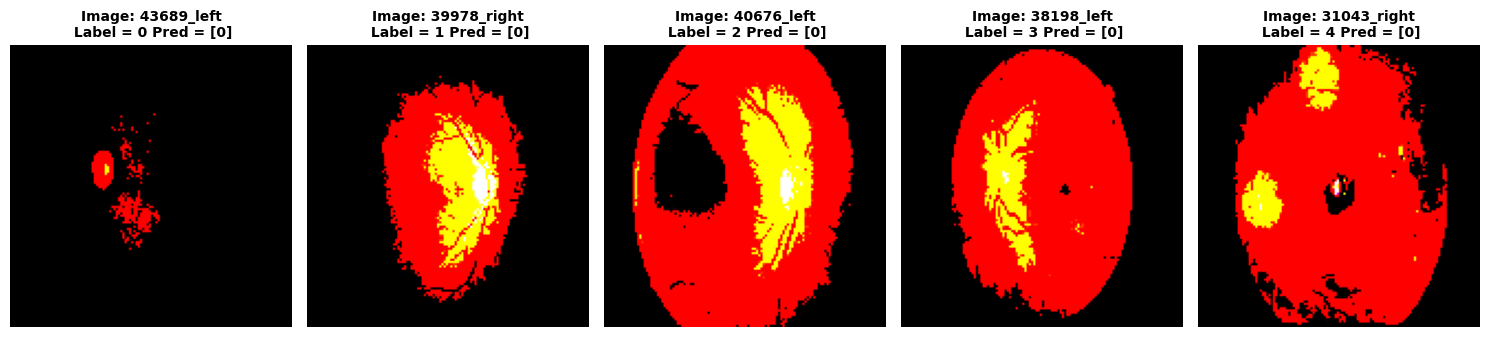

In [ ]:
from keras.preprocessing import image as image_utils
from keras.applications.imagenet_utils import preprocess_input
fig, ax = plt.subplots(1, 5, figsize=(15, 6))
def load_and_scale_image(image):
    image = cv2.resize(image,(128, 128))
    image = image_utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    return image

for i in range(5):
    sample = data[data['level'] == i].sample(1)
    image_name = sample['image'].item()
    img = cv2.imread('E:/trainingset/archive/resized_train/' + image_name + '.jpeg')
    img = load_and_scale_image(img)
    preds = model.predict(img)
    print(preds[0])
    predicted_class = np.argmax(preds[0], axis=1)
    ax[i].set_title(f"Image: {image_name}\n Label = {sample['level'].item()} Pred = {predicted_class}", 
                    weight='bold', fontsize=10)
    ax[i].axis('off')
    ax[i].imshow(img[0]);
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 130ms/step
[array([0.7002674 , 0.07812374, 0.1668291 , 0.03082918, 0.02395064],
      dtype=float32)]
1/1 [==============================] - 0s 87ms/step
[array([0.7002674 , 0.07812374, 0.1668291 , 0.03082918, 0.02395064],
      dtype=float32)]
1/1 [==============================] - 0s 86ms/step
[array([0.65660954, 0.10324284, 0.17775053, 0.03817953, 0.02421769],
      dtype=float32)]
1/1 [==============================] - 0s 30ms/step
[array([0.7002674 , 0.07812374, 0.1668291 , 0.03082918, 0.02395064],
      dtype=float32)]
1/1 [==============================] - 0s 50ms/step
[array([0.7002674 , 0.07812374, 0.1668291 , 0.03082918, 0.02395064],
      dtype=float32)]


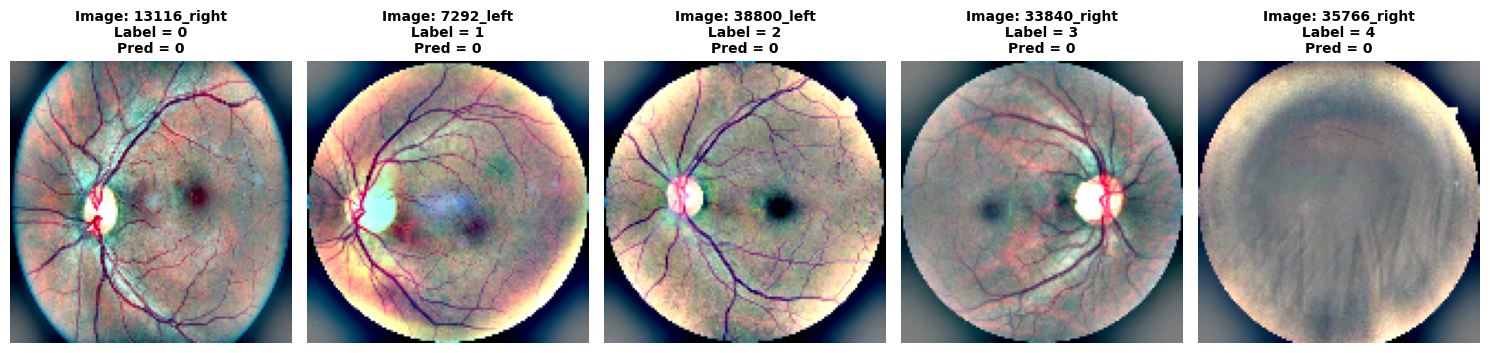

In [41]:
fig, ax = plt.subplots(1, 5, figsize=(15, 6))
for i in range(0,5):
    sample = data[data['level'] == i].sample(1)
    image_name = sample['image'].item()
    img = cv2.imread('E:/trainingset/archive/resized_train/' + image_name + '.jpeg')
    X = preprocess_image(img)
    single_image = np.expand_dims(X, axis=0)
    predicted_label = list(model.predict(single_image))
    print(predicted_label)
    maxindex = predicted_label.index(max(predicted_label))
    ax[i].set_title(f"Image: {image_name}\n Label = {sample['level'].item()} \nPred = {maxindex}", 
                    weight='bold', fontsize=10)
    ax[i].axis('off')
    ax[i].imshow(X);
plt.tight_layout()
plt.show()